<a href="https://colab.research.google.com/github/brypergolic93/greatcoursesplus/blob/main/ch_03_decision_trees_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
from sklearn import tree
import graphviz
import random
import matplotlib.pyplot as plt

In [2]:
!wget https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv

--2021-03-09 06:01:48--  https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/plain]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  23.31K  --.-KB/s    in 0.002s  

2021-03-09 06:01:48 (11.0 MB/s) - ‘diabetes.csv’ saved [23873/23873]



In [13]:
with open("diabetes.csv", "r") as f:
    data = f.readlines()
feats = data[0]
feats = feats.replace('\n','')
feats = feats.split(",") 

# the last column are the labels ("Outcomes") so we will remove that column from the features
feats = feats[0:(len(feats) - 1)]

In [27]:
all_data = []
all_labels = []

for i in range (1,len(data)):

    line = data[i]
    line = line.replace('\n','')
    csvline = line.split(",")

    all_labels += [int(csvline[len(csvline) - 1])]
    csvline = [float(csvline[i]) for i in range(len(csvline)-1)]
    all_data += [csvline]

We next will create a `trainmask` and use it to create the train, test data.

In [28]:
# create random labels, 0 and 1 to assign to all data
trainmask = [random.randint(0,2) for i in range(len(all_data))]

# training data 
traindat = [all_data[i] for i in range(len(all_data)) if trainmask[i]]
trainlabs = [all_labels[i] for i in range(len(all_data)) if trainmask[i]]
# test data to see how well the model was trained
testdat = [all_data[i] for i in range(len(all_data)) if not trainmask[i]]
testlabs = [all_labels[i] for i in range(len(all_data)) if not trainmask[i]]			

Using scikit-learn, train a decision tree with 3 decision rules and fit to our data and labels.

In [40]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes = 20)
clf = clf.fit(traindat, trainlabs)

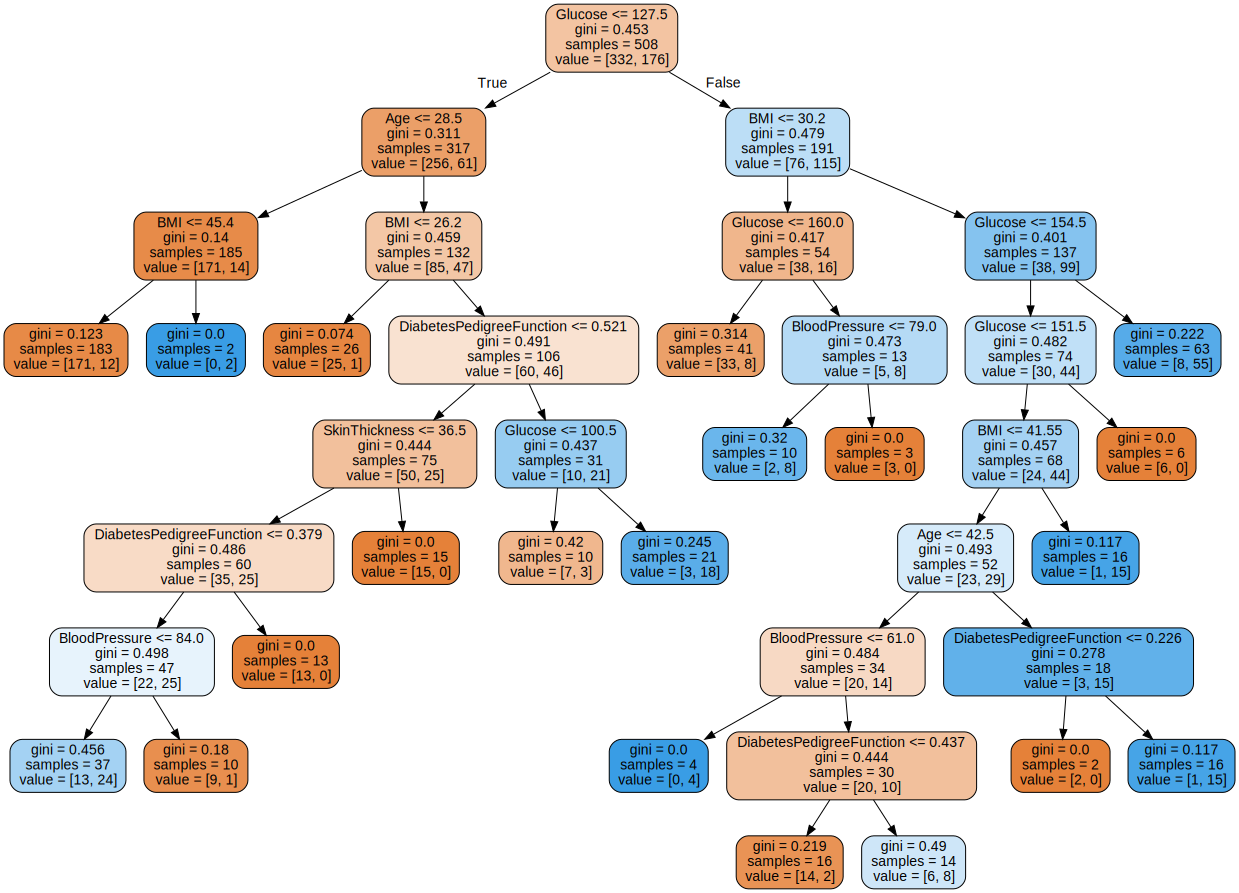

In [41]:
dot_data = tree.export_graphviz(clf, feature_names=feats,
                      filled=True, rounded=True) 
graph = graphviz.Source(dot_data)	
graph	

We will now fit different classifier models, varying the number of splits. We will then calculate the training and test error of each model.

In [39]:
trainerr = []
testerr = []

nleaves = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,25,30,50]

for leaves in nleaves:
    clf = tree.DecisionTreeClassifier(max_leaf_nodes = leaves)
    clf.fit(traindat,trainlabs)

    pred = clf.predict(traindat)
    trainerr += [sum([pred[i] != trainlabs[i] for i in range(len(trainlabs))]) / len(trainlabs)]
    
    pred = clf.predict(testdat)
    testerr += [sum([pred[i] != testlabs[i] for i in range(len(testlabs))]) / len(testlabs)]

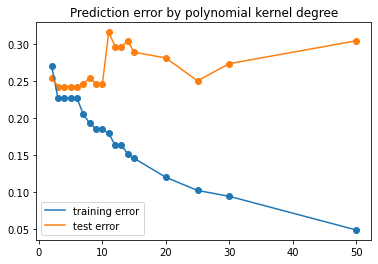

In [35]:
plt.scatter(nleaves, trainerr)
plt.plot(nleaves, trainerr, label='training error')
plt.scatter(nleaves, testerr)
plt.plot(nleaves, testerr, label='test error')
plt.legend()
plt.title('Prediction error by polynomial kernel degree')
plt.show()